<a href="https://colab.research.google.com/github/BakedBel/CodigosTesis/blob/main/DitheringEIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import rotate
import cv2
from PIL import Image
from scipy.ndimage import zoom

In [ ]:
nameG="D"
nameO="RAW"+nameG
nameP="Simulaciones"
nameI="G4MProc"
nameE="TestAng"
nameV=20
nameS="PP-samp-dith"
#name0=nameP+"/"+nameI+"/"+nameE+"/"+str(nameV)+"/"
name0="PPdith"
PDith=7
Npixeles=256
NThr=1
z_FS=0.6
z_SD=0.6
z_FD=z_FS+z_SD
M=z_FD/z_FS
a=10*(10**(-6))
W=55*(10**(-6))
E=nameV*(10**(3))
E_J=E*1.6*(10**(-19))
h=6.63*10**(-34)
c=3*(10**(8))
k=(2*np.pi*E_J)/(h*c)
o=k/z_SD

In [ ]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

In [ ]:
def Wiener2(name,W,Dx,vo,n,s):
    frr = np.fft.fftshift(np.fft.fft2(name))
    u=np.fft.fftshift(np.fft.fftfreq(name.shape[1], 2*W))
    v=np.fft.fftshift(np.fft.fftfreq(name.shape[0], W))
    uu, vv = np.meshgrid(u, v)
    SNR=s/(1+(vv/vo)**(2*n))
    D=-2j*np.sin(2*np.pi*Dx*uu)
    Dc=np.conj(D)
    DFrq=Dc/(D**2+(1/SNR))
    A=frr*DFrq
    A2=(np.fft.ifft2(np.fft.ifftshift(A)).real)*Dx
    return A2

In [ ]:
Dith=[]
for i in range(1,PDith+1):
    #RAW=np.genfromtxt(name0+"Dt{}/".format(i)+nameS+"/"+nameO+".txt")
    RAW=np.genfromtxt(name0+"{}".format(i)+".txt")
    Dith.append(RAW)

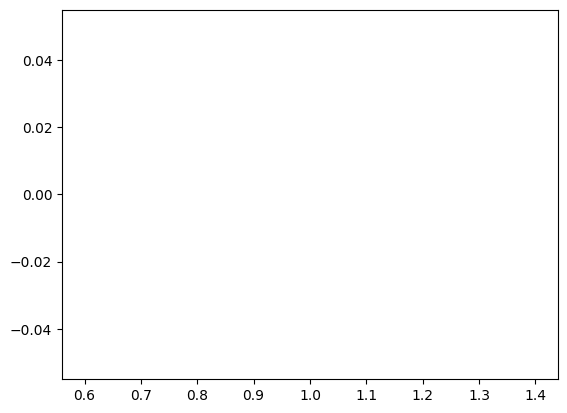

In [ ]:
HtTh0=plt.hist(np.ravel(Dith[0]),bins=50,color="blue",range=(0.6,1.4))

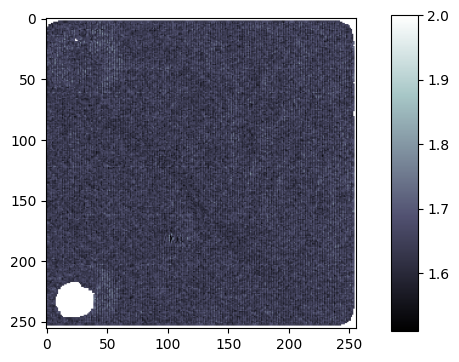

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(Dith[2], cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
#plt.savefig(name3+"/In-line.png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [ ]:
ImPCYY=[]
ImPCYA=[]
AbsYY=[]
PhaseDYY=[]
for i in range(PDith):
    ImPCYY.append(Dith[i][:,1::2])
    ImPCYA.append(Dith[i][:,::2])
    AbsYY.append((Dith[i][:,::2]+Dith[i][:,1::2])/2)
    PhaseDYY.append(((M*a*o)/2)*((Dith[i][:,1::2]-Dith[i][:,::2])/(Dith[i][:,::2]+Dith[i][:,1::2])))

In [ ]:
ImPCODith=np.zeros((Npixeles,PDith*int(Npixeles/2)))
ImPCEDith=np.zeros((Npixeles,PDith*int(Npixeles/2)))
AbsDith=np.zeros((Npixeles,PDith*int(Npixeles/2)))
PhaseDDith=np.zeros((Npixeles,PDith*int(Npixeles/2)))
for i in range(PDith):
    for j in range(int(Npixeles/2)):
        ImPCODith[:,PDith*j+i:PDith*j+i+1]=ImPCYY[PDith-1-i][:,j:j+1]
        ImPCEDith[:,PDith*j+i:PDith*j+i+1]=ImPCYA[PDith-1-i][:,j:j+1]
        AbsDith[:,PDith*j+i:PDith*j+i+1]=AbsYY[PDith-1-i][:,j:j+1]
        PhaseDDith[:,PDith*j+i:PDith*j+i+1]=PhaseDYY[PDith-1-i][:,j:j+1]
Factor = ImPCODith.shape[1] / ImPCODith.shape[0]
ImPCODithS= zoom(ImPCODith, (Factor, 1))
ImPCEDithS= zoom(ImPCEDith, (Factor, 1))
AbsDithS= zoom(AbsDith, (Factor, 1))
PhaseDDithS= zoom(PhaseDDith, (Factor, 1))

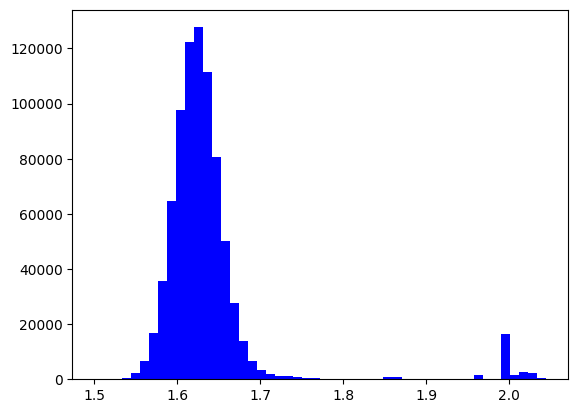

In [ ]:
HistPCDith=plt.hist(np.ravel(ImPCODithS),bins=50,color="blue")

Text(0.5, 1.0, 'DP 28 keV RH filter')

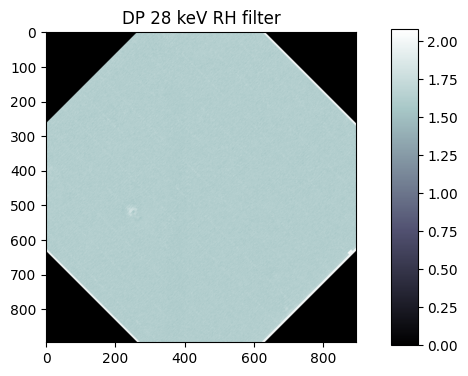

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
Im_rotada = rotate(ImPCODithS, -45, reshape=False)
u=ax.imshow(Im_rotada, cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
plt.title("DP 28 keV RH filter")
#plt.savefig(name0+nameS+"/ImPEDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [ ]:

Ms= np.zeros(ImPCODithS.shape)
Im_rotada = rotate(Ms, -45, reshape=False)
Im_rotada[:,220:300]=1

Mb= np.zeros(ImPCODithS.shape)
Im_rotada2 = rotate(Mb, -45, reshape=False)
Im_rotada2[:,400:480]=1

a = ImPCODithS * Ms
S = np.mean(a[a != 0])

b = ImPCODithS * Mb
B = np.mean(b[b != 0])

sigmaB= np.std(b[b != 0])

CNR = np.abs(S - B) / sigmaB

print(CNR)

nan


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


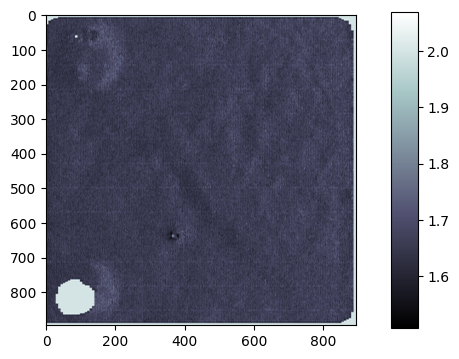

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(ImPCEDithS, cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
#plt.savefig(name0+nameS+"/ImPMDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [ ]:
Ms= np.zeros(ImPCEDithS.shape)
Ms[:,260:265]=1

Mb= np.zeros(ImPCEDithS.shape)
Mb[:,400:405]=1

a = ImPCEDithS * Ms
S = np.mean(a[a != 0])

b = ImPCODithS * Mb
B = np.mean(b[b != 0])

sigmaB= np.std(b[b != 0])

CNR = np.abs(S - B) / sigmaB

print(CNR)

0.5996768914133073


In [ ]:
PIPCODith=PI(ImPCODithS,0,ImPCODithS.shape[0],0,ImPCODithS.shape[1])
PIPCEDith=PI(ImPCEDithS,0,ImPCEDithS.shape[0],0,ImPCEDithS.shape[1])

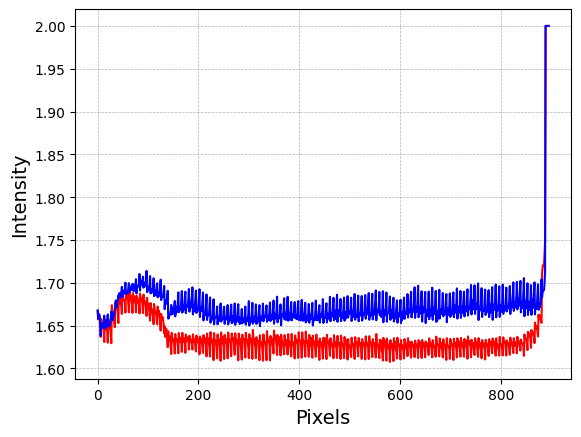

In [ ]:
plt.plot(PIPCODith, '-', color="red", label="Odd")
plt.plot(PIPCEDith, '-', color="blue", label="Even")
plt.xlabel("Pixels",fontsize=14)
plt.ylabel("Intensity",fontsize=14)
plt.grid(linestyle = '--', linewidth = 0.5)
#plt.savefig(name0+nameS+"/PIImPDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

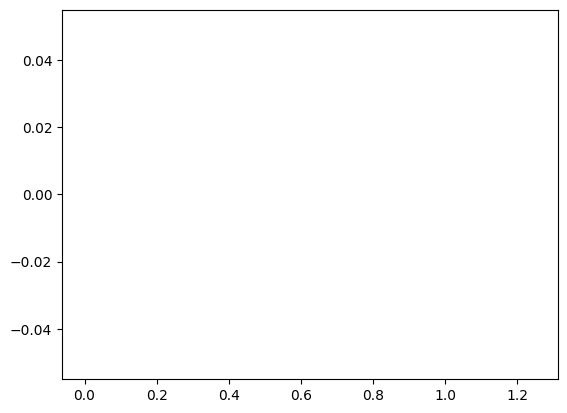

In [ ]:
HistAbsDith=plt.hist(np.ravel(AbsDith),bins=50,color="blue",range=(0.,1.25))

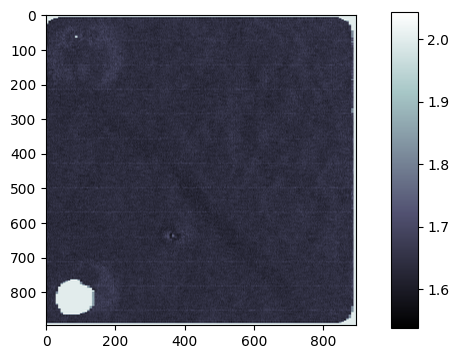

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(AbsDithS, cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
#plt.savefig(name0+nameS+"/AbsDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [ ]:
Ms= np.zeros(AbsDithS.shape)
Ms[:,250:260]=1

Mb= np.zeros(AbsDithS.shape)
Mb[:,400:410]=1

a = AbsDithS * Ms
S = np.mean(a[a != 0])

b = ImPCODithS * Mb
B = np.mean(b[b != 0])

sigmaB= np.std(b[b != 0])

CNR = np.abs(S - B) / sigmaB

print(CNR)

0.3022068773462904


In [ ]:
PIAbsDith=PI(AbsDith,0,AbsDith.shape[0],0,AbsDith.shape[1])

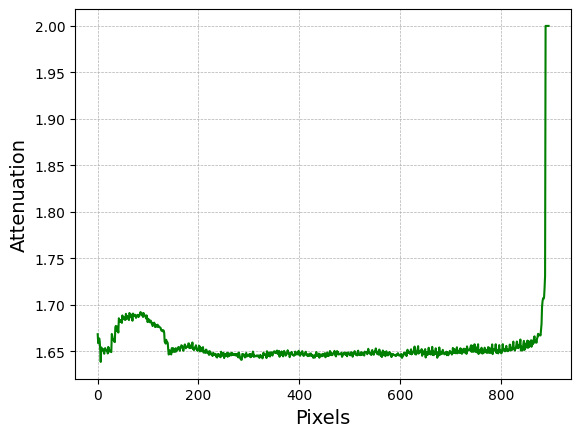

In [ ]:
plt.plot(PIAbsDith, '-', color="green")
plt.xlabel("Pixels",fontsize=14)
plt.ylabel("Attenuation",fontsize=14)
#plt.ylim(-390,10)
plt.grid(linestyle = '--', linewidth = 0.5)
#plt.savefig(name0+nameS+"/PIAbsDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

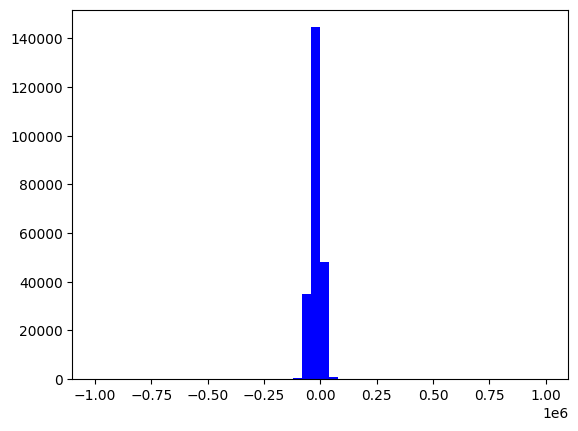

In [ ]:
HistPhaseDDith=plt.hist(np.ravel(PhaseDDith),bins=50,color="blue",range=(-1e6,1e6))

Text(0.5, 1.0, 'DP PMMA Flattfield')

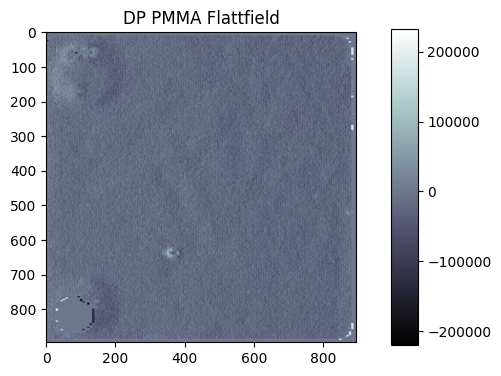

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(PhaseDDithS, cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
plt.title("DP PMMA Flattfield")
#plt.savefig(name0+nameS+"/PhaseDDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [ ]:
PIPhDDith=PI(PhaseDDith,0,PhaseDDith.shape[0],0,PhaseDDith.shape[1])

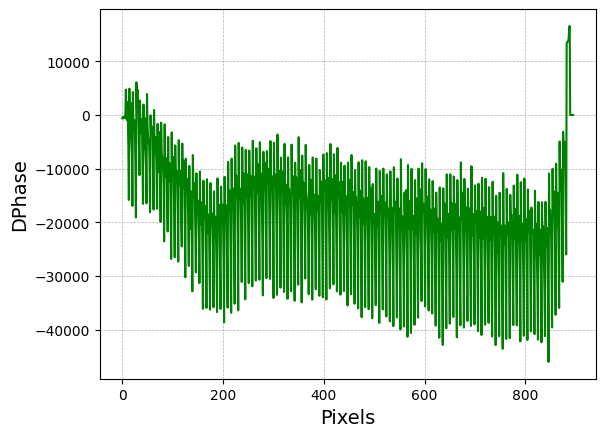

In [ ]:
plt.plot(PIPhDDith, '-', color="green")
plt.xlabel("Pixels",fontsize=14)
plt.ylabel("DPhase",fontsize=14)
plt.grid(linestyle = '--', linewidth = 0.5)
#plt.savefig(name0+nameS+"/PIPhaseDDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [ ]:
#vo=1*(10**(2))
#s=1*(10**(3))
#n=1
Dx=2*W
vo=6*(10**(-5))
s=2*(10**(6))
n=1
PhaseDith=Wiener2(PhaseDDith,W,Dx,vo,n,s)
PhaseDithS= zoom(PhaseDith, (Factor, 1))

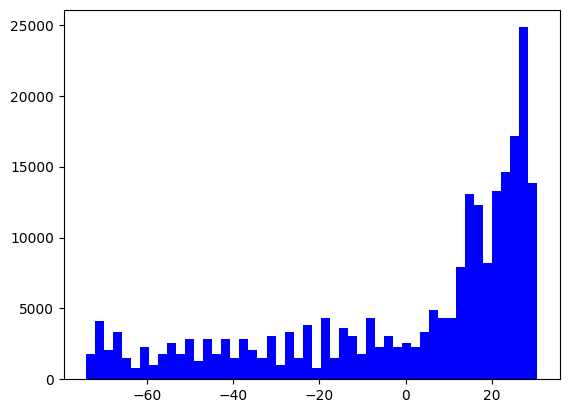

In [ ]:
HistPhaseDith=plt.hist(np.ravel(PhaseDith),bins=50,color="blue")

Text(0.5, 1.0, 'Wiener Filter')

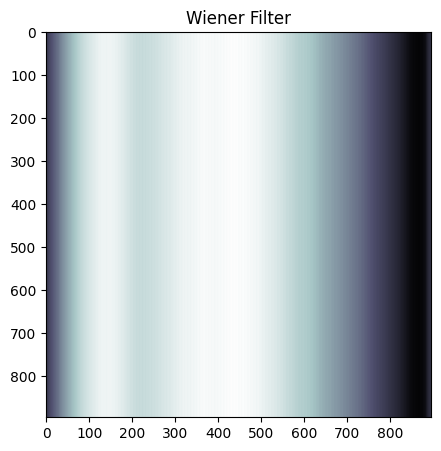

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(PhaseDithS, cmap="bone")
plt.title("Wiener Filter")
#,vmin=-600,vmax=400
#plt.xticks([])
#plt.yticks([])
#plt.savefig(name0+"/PData/PhaseDDith.png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [ ]:
PIPhDith=PI(PhaseDith,0,PhaseDith.shape[0],0,PhaseDith.shape[1])

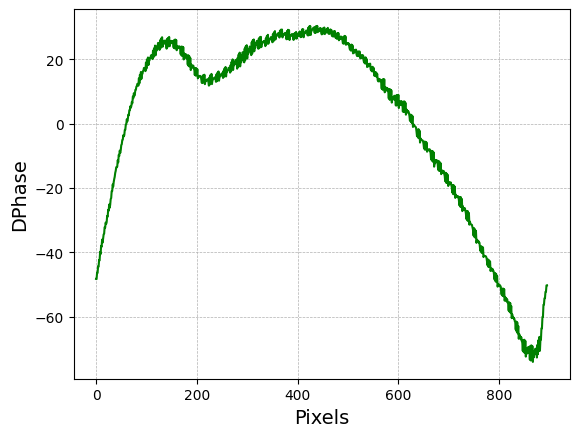

In [ ]:
plt.plot(PIPhDith, '-', color="green")
plt.xlabel("Pixels",fontsize=14)
plt.ylabel("DPhase",fontsize=14)
#plt.ylim(-390,10)
plt.grid(linestyle = '--', linewidth = 0.5)